## Установка PySpark

In [1]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,939 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,793 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/un

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [7]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz

In [8]:
!tar -xvf spark-3.5.4-bin-hadoop3.tgz

spark-3.5.4-bin-hadoop3/
spark-3.5.4-bin-hadoop3/R/
spark-3.5.4-bin-hadoop3/R/lib/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.5.4-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.5.4-bin-hadoop3/R/lib/SparkR/profile/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/profile/shell.R
spark-3.5.4-bin-hadoop3/R/lib/SparkR/profile/general.R
spark-3.5.4-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/index.html
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.5.4-bin-hadoop3/R/lib/SparkR/html/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/html/00Index.html
spark-3.5.4-bin-hadoop3

In [9]:
!pip install -q findspark

In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3"

In [13]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [16]:
df = spark.read.csv('iris.CSV', inferSchema = True, header = True)
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [20]:
df.groupby('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [21]:
df.groupby('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [24]:
df.groupby('variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [25]:
import matplotlib.pyplot as plt

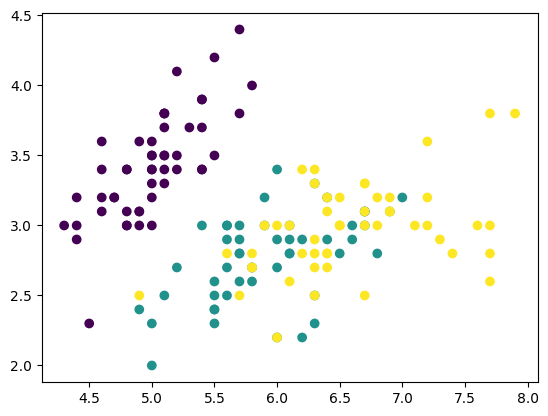

In [26]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

Text(0, 0.5, 'petal_width')

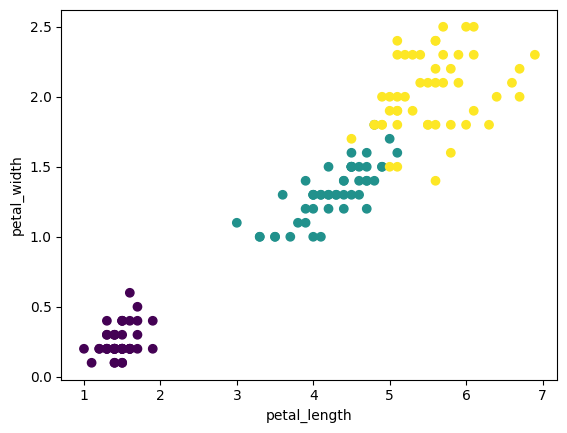

In [44]:
plt.scatter(x = df[['petal_length']].collect(), y = df[['petal_width']].collect(), c = df[['variety_num']].collect())
plt.xlabel('petal_length')
plt.ylabel('petal_width')

## Если значение параметра 'petal_length' меньше 2, то IRIS относится к классу SETOSA. Иначе к другому

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [45]:
from pyspark.sql.functions import when

In [50]:
df_predict = df.withColumn('prediction', when(df.petal_length < 2, 'Setosa').otherwise('Unknown'))
df_predict.show(5)

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
+------------+-----------+------------+-----------+-------+-----------+----------+
only showing top 5 rows



## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [58]:
df_predict[(df_predict['prediction'] == 'Setosa') & (df_predict['variety'] == df_predict['prediction'])].count()

50

In [59]:
df_predict[(df_predict['prediction'] == 'Setosa') & (df_predict['variety'] != df_predict['prediction'])].count()

0